# Hoja De Trabajo 2

## **Sección 1**

#### 1. Visualicen los datos para ver si pueden detectar algunos grupos. Ayuda: utilicen la forma del sépalo:

In [56]:
## Importar librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans

In [57]:
## Importar dataset
iris = pd.read_csv('iris.csv')

iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [58]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Se agrupa por ancho de sépalo

In [59]:
iris.groupby('sepal_width').size()

sepal_width
2.0     1
2.2     3
2.3     4
2.4     3
2.5     8
2.6     5
2.7     9
2.8    14
2.9    10
3.0    26
3.1    12
3.2    13
3.3     6
3.4    12
3.5     6
3.6     3
3.7     3
3.8     6
3.9     2
4.0     1
4.1     1
4.2     1
4.4     1
dtype: int64

#### Se agrupa por largo de sépalo

In [60]:
iris.groupby('sepal_length').size()

sepal_length
4.3     1
4.4     3
4.5     1
4.6     4
4.7     2
4.8     5
4.9     6
5.0    10
5.1     9
5.2     4
5.3     1
5.4     6
5.5     7
5.6     6
5.7     8
5.8     7
5.9     3
6.0     6
6.1     6
6.2     4
6.3     9
6.4     7
6.5     5
6.6     2
6.7     8
6.8     3
6.9     4
7.0     1
7.1     1
7.2     3
7.3     1
7.4     1
7.6     1
7.7     4
7.9     1
dtype: int64

El método de separación que parece más viable es por el ancho del sépalo: ```sepal_width```

#### 2. Creen 2 "clusters" utilizando K_Means Clustering y grafiquen los resultados.

In [61]:
## Utilizar KMeans Clustering para crear 2 clusters
kmeans = KMeans(n_clusters=2)
X = iris
kmeans.fit(X)
print(kmeans.cluster_centers_)

[[6.30103093 2.88659794 4.95876289 1.69587629]
 [5.00566038 3.36037736 1.56226415 0.28867925]]


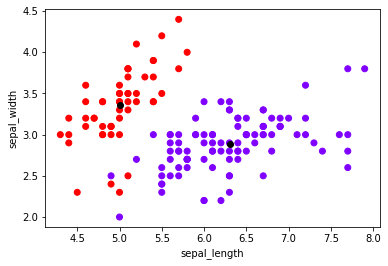

In [62]:
# Graficar los clusters
plt.scatter( X['sepal_length'], X['sepal_width'], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black')
plt.ylabel('sepal_width')
plt.xlabel('sepal_length')
plt.show()

#### 3. Estandaricen los datos e intenten el paso 2, de nuevo. ¿Qué diferencias hay, si es que lo hay?

Estandarizar los datos

In [63]:
## Estandarizar los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(iris)
scaled_data = scaler.transform(iris)

Repetir el paso 2

[[-1.01457897  0.84230679 -1.30487835 -1.25512862]
 [ 0.50728948 -0.4211534   0.65243918  0.62756431]]


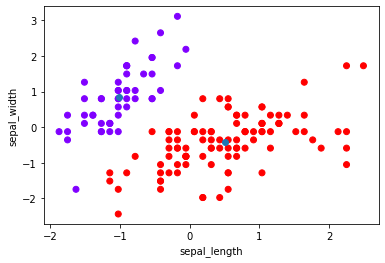

In [64]:
## Utilizar KMeans Clustering para crear 2 clusters
kmeans = KMeans(n_clusters=2)
X = scaled_data
kmeans.fit(X)
print(kmeans.cluster_centers_)

import itertools

# Graficar los clusters
plt.scatter( X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1])
plt.ylabel('sepal_width')
plt.xlabel('sepal_length')
plt.show()

Ahora está más marcada la división entre los grupos, antes habían unos puntos de un clusted mezclados con el otro. (Cerca del punto [2,5]).
Ahora que claramente los datos están estandarizados, se nota una mejor división de clústers.

#### 4. Utilicen el método del "codo" para determinar cuantos "clusters" es el ideal. (prueben un rango de 1 a 10)

Text(0, 0.5, 'WCSS')

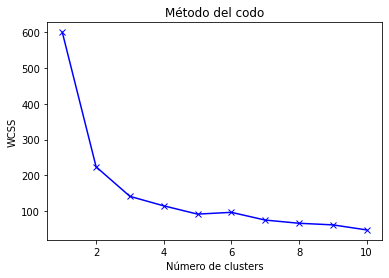

In [65]:
## Determinar con el método del codo cuantos clusters se deben utilizar
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, 'bx-')
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')

#### 5. Basado en la gráfica del "codo" realicen varias gráficas con el número de clusters (unos 3 o 4 diferentes) que Uds creen mejor se ajusten a los datos.

[[-0.16840578 -0.97008147  0.25962078  0.17609756]
 [ 1.03359865  0.01388418  0.94369497  0.97226253]
 [-1.00206653  0.89510445 -1.30297509 -1.25663117]]


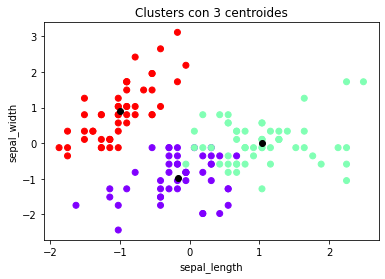

[[-1.01457897  0.84230679 -1.30487835 -1.25512862]
 [ 1.13597027  0.09659843  0.996271    1.01717187]
 [-0.05021989 -0.88029181  0.34753171  0.28206327]]


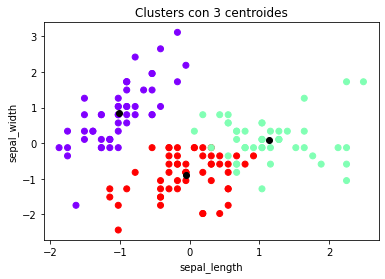

[[-1.01457897  0.84230679 -1.30487835 -1.25512862]
 [-0.01139555 -0.87288504  0.37688422  0.31165355]
 [ 1.16743407  0.15377779  1.00314548  1.02963256]]


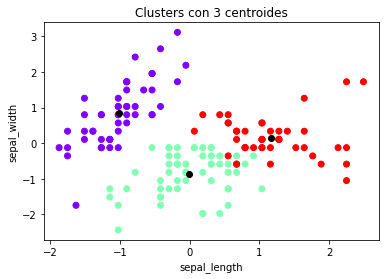

[[-0.16840578 -0.97008147  0.25962078  0.17609756]
 [-1.00206653  0.89510445 -1.30297509 -1.25663117]
 [ 1.03359865  0.01388418  0.94369497  0.97226253]]


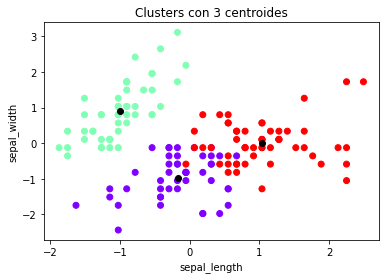

In [66]:
for i in range(0, 4):
    kmeans = KMeans(n_clusters=3)
    X = scaled_data
    kmeans.fit(X)
    print(kmeans.cluster_centers_)

    # Graficar los clusters
    plt.scatter( X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black')
    plt.title('Clusters con 3 centroides')
    plt.ylabel('sepal_width')
    plt.xlabel('sepal_length')
    plt.show()

#### 6. Comparen sus soluciones con los datos reales, archivo: iris-con-respuestas.csv
- ¿Funcionó el clustering con la forma del sépalo?

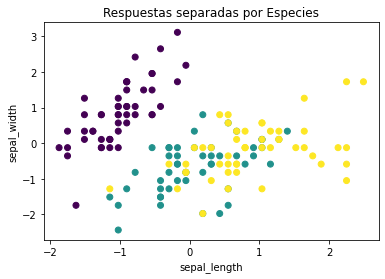

<Figure size 432x288 with 0 Axes>

In [67]:
## Utilizar iris-con-respuestas.csv y graficar los clusters por especie
iris_respuestas = pd.read_csv('iris-con-respuestas.csv')

## Codificar las especies a números
iris_respuestas['species'] = iris_respuestas['species'].map({'setosa':0, 'versicolor':1, 'virginica':2})
## Estandarizar los datos sin columna especies
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(iris_respuestas.drop('species', axis=1))
new_scaled_data = scaler.transform(iris_respuestas.drop('species', axis=1))

#graficar los clusters
plt.scatter(new_scaled_data[:,0], new_scaled_data[:,1], c=iris_respuestas['species'])
plt.title('Respuestas separadas por Especies')
plt.ylabel('sepal_width')
plt.xlabel('sepal_length')
# Mostrar que significa cada color
plt.figure()
plt.show()

- Los clusters de ambas gráficas parecen estar divididos de la misma manera, sin embargo la gráfica del archivo ```iris-con-respuestas.csv``` tiene unos puntos mezclados entre los dos clústers de abajo.
- Si funcionó el clústering de los datos iniciales según el ancho y largo del sépalo de la planta.
- Además el uso del método del codo nos ayudó a poder definir la cantidad de clusters ideal para el dataset.

## **Sección 2**

Repitan el proceso pero ahora utilizando la forma del pétalo. Respondan a las mismas preguntas

In [68]:
## Importar dataset
iris2 = pd.read_csv('iris.csv')

iris2.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [69]:
iris2.groupby('sepal_length').size()

sepal_length
4.3     1
4.4     3
4.5     1
4.6     4
4.7     2
4.8     5
4.9     6
5.0    10
5.1     9
5.2     4
5.3     1
5.4     6
5.5     7
5.6     6
5.7     8
5.8     7
5.9     3
6.0     6
6.1     6
6.2     4
6.3     9
6.4     7
6.5     5
6.6     2
6.7     8
6.8     3
6.9     4
7.0     1
7.1     1
7.2     3
7.3     1
7.4     1
7.6     1
7.7     4
7.9     1
dtype: int64

In [70]:
## Utilizar KMeans Clustering para crear 2 clusters
kmeans = KMeans(n_clusters=2)
X = iris2
kmeans.fit(X)
print(kmeans.cluster_centers_)

[[6.30103093 2.88659794 4.95876289 1.69587629]
 [5.00566038 3.36037736 1.56226415 0.28867925]]


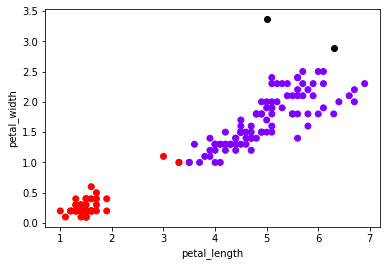

In [71]:
# Graficar los clusters
plt.scatter( X['petal_length'], X['petal_width'], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black')
plt.ylabel('petal_width')
plt.xlabel('petal_length')
plt.show()

In [72]:
## Estandarizar los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(iris2)
scaled_data2 = scaler.transform(iris2)

[[ 0.50728948 -0.4211534   0.65243918  0.62756431]
 [-1.01457897  0.84230679 -1.30487835 -1.25512862]]


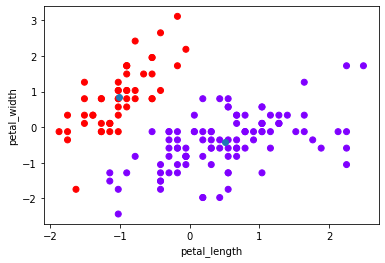

In [73]:
## Utilizar KMeans Clustering para crear 2 clusters
kmeans = KMeans(n_clusters=2)
X = scaled_data2
kmeans.fit(X)
print(kmeans.cluster_centers_)

import itertools

# Graficar los clusters
plt.scatter( X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1])
plt.ylabel('petal_width')
plt.xlabel('petal_length')
plt.show()

Text(0, 0.5, 'WCSS')

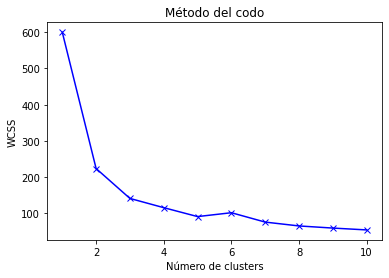

In [74]:
## Determinar con el método del codo cuantos clusters se deben utilizar
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, 'bx-')
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')

[[-1.01457897  0.84230679 -1.30487835 -1.25512862]
 [-0.01139555 -0.87288504  0.37688422  0.31165355]
 [ 1.16743407  0.15377779  1.00314548  1.02963256]]


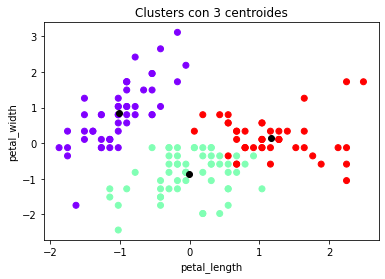

[[-1.31926109 -0.34584225 -1.14482725 -1.1336954 ]
 [ 0.57100359 -0.36600236  0.69108416  0.66322635]
 [-0.80601877  1.33577362 -1.28618375 -1.21026347]]


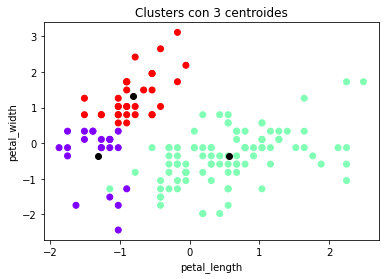

[[-0.01139555 -0.87288504  0.37688422  0.31165355]
 [-1.01457897  0.84230679 -1.30487835 -1.25512862]
 [ 1.16743407  0.15377779  1.00314548  1.02963256]]


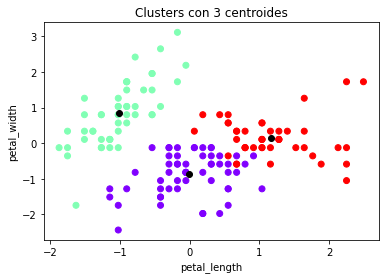

[[-1.31926109 -0.34584225 -1.14482725 -1.1336954 ]
 [ 0.57100359 -0.36600236  0.69108416  0.66322635]
 [-0.80601877  1.33577362 -1.28618375 -1.21026347]]


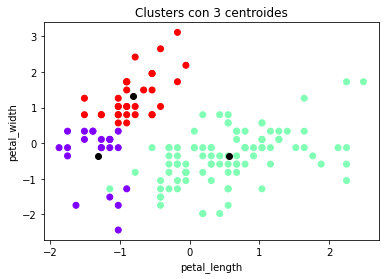

In [77]:
for i in range(0, 4):
    kmeans = KMeans(n_clusters=3)
    X = scaled_data2
    kmeans.fit(X)
    print(kmeans.cluster_centers_)

    # Graficar los clusters
    plt.scatter( X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black')
    plt.title('Clusters con 3 centroides')
    plt.ylabel('petal_width')
    plt.xlabel('petal_length')
    plt.show()

## **Sección 3**

Utilicen la librería "kneed" y vean si el resultado coincide con el método del "codo" que hicieron manualmente. ¿A que podría deberse la diferencia, si la hay? ¿Les dió el número correcto de clusters, comparado a los datos reales?

Basado en los resultado que tuvieron, ¿A qué conclusiones llegaron?